<a href="https://colab.research.google.com/github/catiR/aligned-reaper/blob/main/prosody.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prosody tracks - basic demo

### See the pitch and intensity (root mean squared energy) for Icelandic speech recordings.

---

How to use:  
Press the arrow in a circle at each code box.  
Wait for it to finish before moving to the next one.  
If you change a value like `filter_point` or `sent_choice`, click the arrow next to it to update. You do **not** need to repeat step 1 "Load the data" after you change the dataset in step 2.  
Tell caitlinr@ru.is about problems.


In [ ]:
#@title 1. Load the data

#@markdown Loading may take a minute as there is a large amount of audio

#@markdown TODO: document where all the data came from

!git clone https://github.com/catiR/aligned-reaper.git

In [12]:
#@title 2. Set up

#@markdown Pick which dataset you want to use:
dataset = 'captini-demo' #@param ["samromur-queries", "captini-demo"]

%matplotlib agg

import glob, librosa, random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from time import sleep
from IPython import display

align_files = glob.glob(f'aligned-reaper/{dataset}/aligns/*.csv')


# get a whole sentence as a string
def get_whole_sent(alignments):
  return ' '.join([l for l,s,e in alignments])

def fid(align_file):
  return align_file[:-4].replace(f'aligned-reaper/{dataset}/aligns/','')

# for a .csv alignment file from the Montreal Forced Aligner:
#   read the word alignments to a list of (label, start_time, end_time)
#   read in the corresponding pitch data
# and output the alignment + pitch data 
#   with informtion on the speaker and sentence
def compile_all_info(align_file):
  file_id = fid(align_file)
  f0_file = f'aligned-reaper/{dataset}/f0/'+file_id+'.f0'
  with open(align_file,'r') as handle:
    # (there could be problems if MFA doesn't sanitise commas from words/phones)
    align_data = [l.split(',') for l in handle.read().splitlines()]
  align_data = [(l[2],float(l[0]),float(l[1])) for l in align_data if l[3] == 'words']
  sentence = get_whole_sent(align_data)
  with open(f0_file,'r') as handle:
    f0_data = handle.read().split('EST_Header_End\n')[1].splitlines()
  f0_data = [ [float(x) for x in l.split(' ')] for l in f0_data]
  return sentence, file_id, align_data, f0_data

# build a dictionary of data for the sentences
#   for each sentence, the entries are a list of tuples
#   (file_id, align_data, f0_data)
#      for all recordings of that sentence
sentences_data = defaultdict(list) 
for a_f in align_files:
  s, f_id, a_dat, f0_dat = compile_all_info(a_f)
  sentences_data[s].append((f_id,a_dat,f0_dat))


# build a dictionary of recordings --> speaker's native language
# in the current version of Samrómur Queries there are only Icelandic speakers
language_dict = {fid(a_f): 'Icelandic' for a_f in align_files}
if dataset == 'captini-demo':
  # replace 'Icelandic' with corect other languages as needed
  lang_id_file = f'aligned-reaper/{dataset}/l2ids.tsv'
  with open(lang_id_file,'r') as handle:
    lang_ids = [l.split('\t') for l in handle.read().splitlines()]
  for rec,lang in lang_ids:
    language_dict[rec] = lang


In [53]:
#@title 3. Show sentence options

#@markdown ### Choose a minimum number of recordings to filter the data:  

filter_point = 5 #@param {type:"integer"}
##@markdown Choose the maximum number of words per sentence. 
##@markdown Longer sentences will be filtered out:
#max_words = 15 #@param {type:"integer"}

#@markdown For **Samrómur Queries**, sentences without this many **total 
#@markdown recordings** will be filtered out.  

#@markdown For **CAPTinI demo**, sentences without at least this many **second-language 
#@markdown recordings** will be filtered out. To see all of the sentences, use 0.

#@markdown \  

#@markdown Samrómur Queries data has 8534 unique sentences, 
#@markdown with 11902 recordings total. 
#@markdown All of them are native speakers. 
#@markdown Only 615 sentences have at least 3 different recordings to compare.

#@markdown CAPTinI data has 271 sentences and 12518 total recordings. 
#@markdown Only 1670 recordings are non-native Icelandic speakers.  
#@markdown Since some sentences have a very large number of native speaker recordings, 
#@markdown it is recommended to check the box `limit_max` to see at most 15 random 
#@markdown native speakers per sentence.
limit_max = True #@param {type:"boolean"}



# filtering options may be different for each dataset
# default to simple filtering
def filter_data(sentences_data):
  def _get_num_l2(one_sent_data):
    langs = [language_dict[file_id] for file_id, align_data, f0_data in one_sent_data]
    langs = [l for l in langs if l != 'Icelandic']
    return len(langs)
  if dataset == 'captini-demo':
    sentences_filtered = {k:v for k,v in sentences_data.items() if _get_num_l2(v)>=filter_point}
  else:
    sentences_filtered = {k:v for k,v in sentences_data.items() if len(v)>=filter_point }
  return sentences_filtered
  #sentences_filtered = {k:v for k,v in sentences_filtered.items() if \
#        (len(k.split(' '))<= max_words) and (len(k.split(' '))> 3) }

sentences_filtered = filter_data(sentences_data)

sent_num = 1 #friendly
wrapper = {}
for k in sorted(list(sentences_filtered.keys())):
  print(f'{sent_num}\t{k}')
  wrapper[sent_num] = k
  sent_num +=1


1	addi lætur sig alltaf hverfa snemma
2	afi kemur í kaffi á morgun
3	allt í lagi segir egill
4	bankinn er langt í burtu
5	bogi hefur áhuga á tónlist
6	brauð og kornvörur fást í matvörubúðinni
7	engum hefur tekist að finna gullið
8	eruð þið með stærri stærð
9	fer hún ekki að koma í heimsókn
10	finnst þér gaman að veiða fisk
11	frænka mín fékk hraðasekt á norðurlandi
12	fólkið vinnur frá morgni til kvölds
13	góðan dag hvað kostar miðinn
14	góðan og blessaðan daginn maggi minn
15	hann er fimm árum yngri en hún
16	hann var prestssonur og ólst upp á norðurlandi
17	hann veiddi fisk en þau veiddu humar
18	hann ætlar að kaupa allar jólagjafirnar
19	hanna bakar pönnukökur með þeyttum rjóma og jarðarberjamarmelaði
20	hefurðu nefnt það við hana
21	hekla er þekkt íslenskt eldfjall
22	hinkraðu aðeins og syngdu eitt lag enn
23	hrafnarnir fljúga hátt yfir þorpinu
24	huginn er í löngu flugi
25	hvar er taskan þín hún er á borðinu
26	hvað kostar þetta
27	hér er enginn banki
28	hér er handklæðið mitt hva

> Listen to 015706-1991808.wav


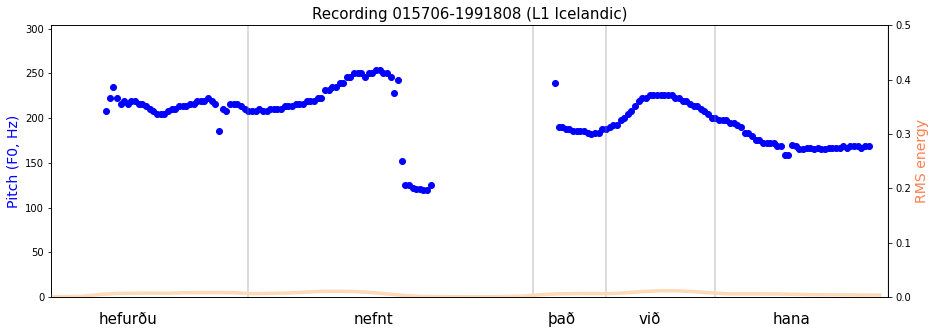




> Listen to 025754-2085335.wav


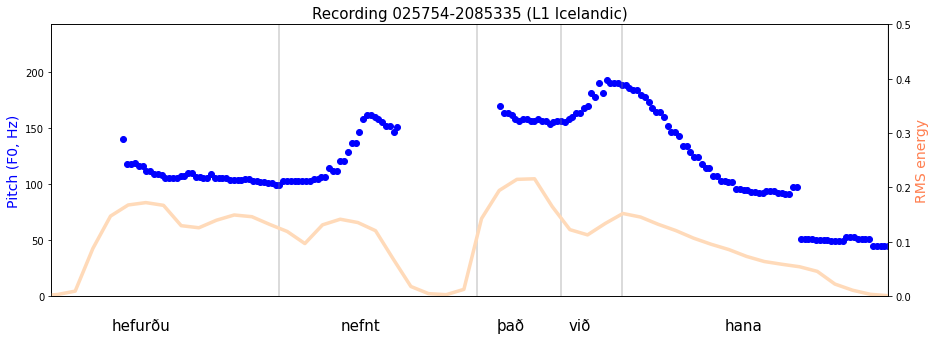




> Listen to 013675-1947204.wav


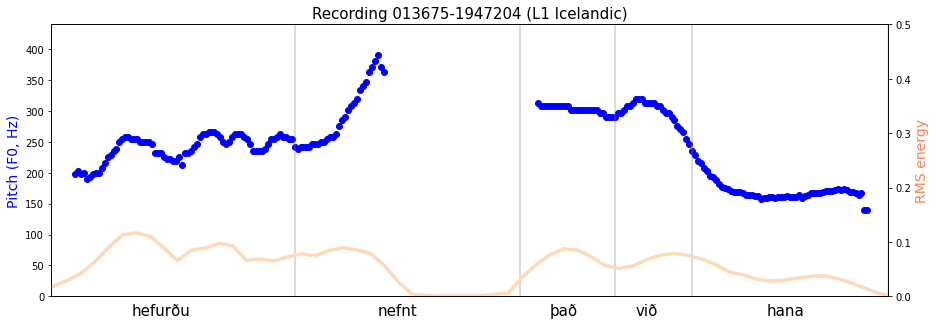




> Listen to 021370-1455045.wav


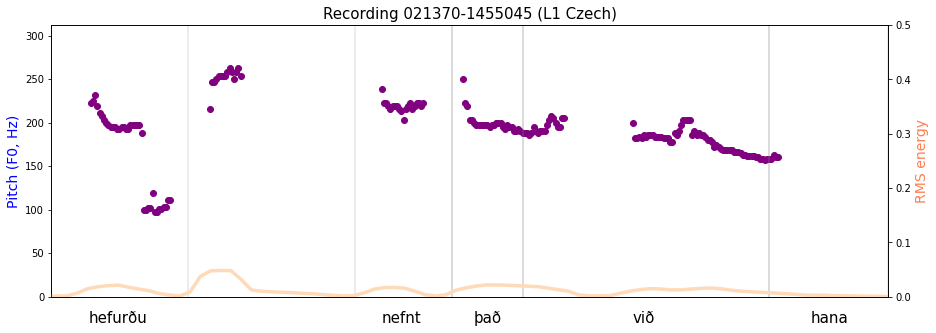




> Listen to 021369-1454863.wav


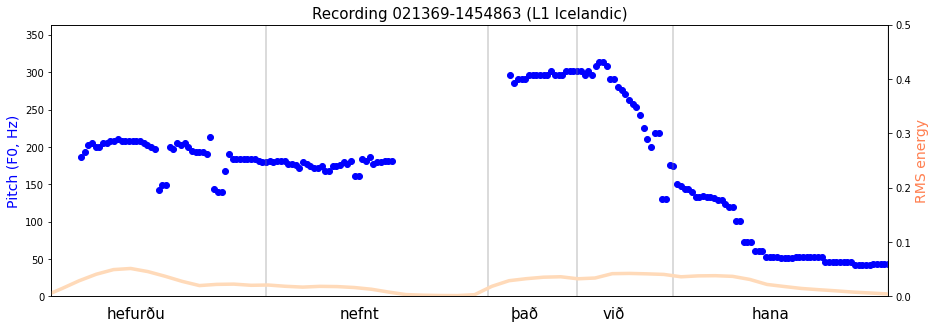




> Listen to 025208-3083914.wav


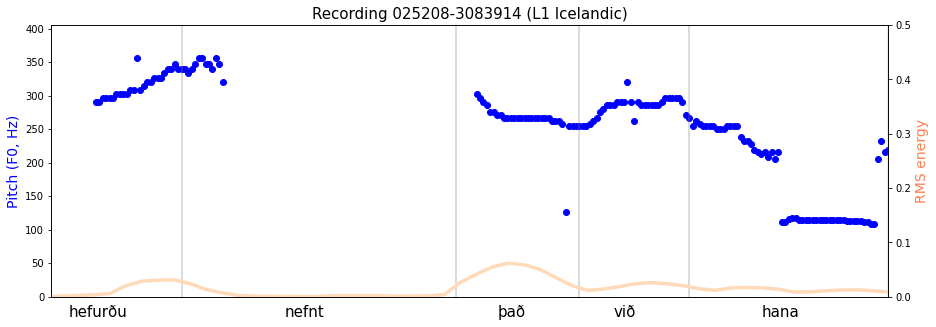




> Listen to 021366-1454273.wav


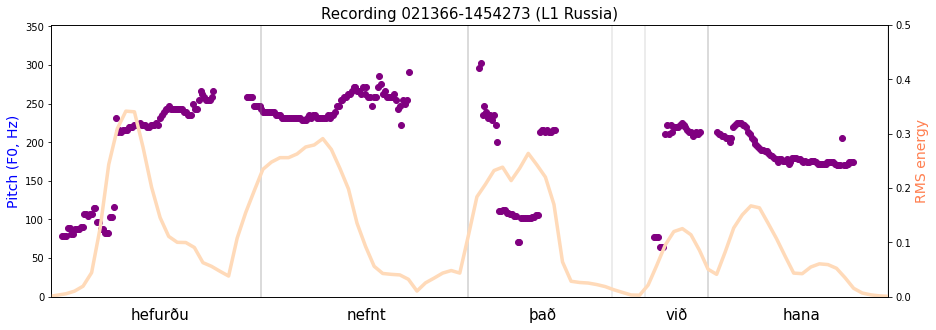




> Listen to 028130-2525883.wav


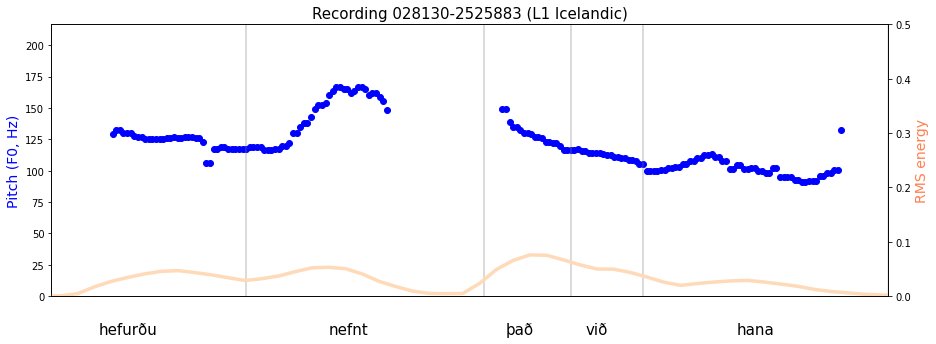




> Listen to 025073-1924963.wav


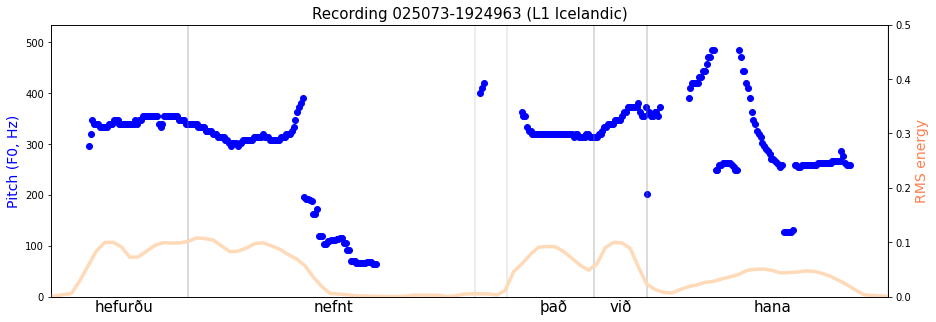




> Listen to 021347-1453061.wav


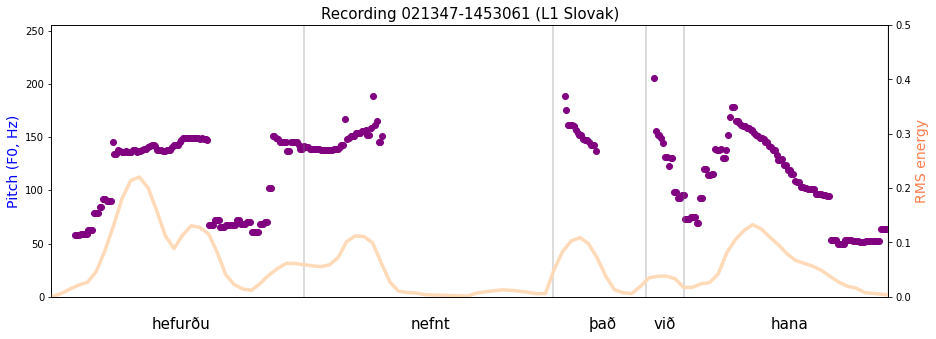




> Listen to 024801-2560192.wav


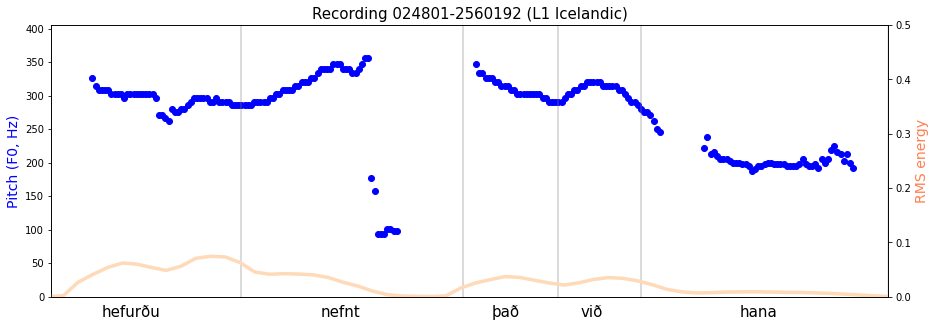




> Listen to 030221-3063526.wav


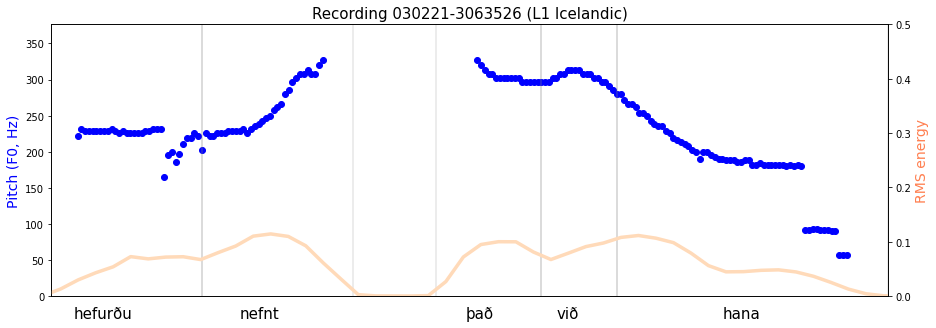




> Listen to 021349-1452989.wav


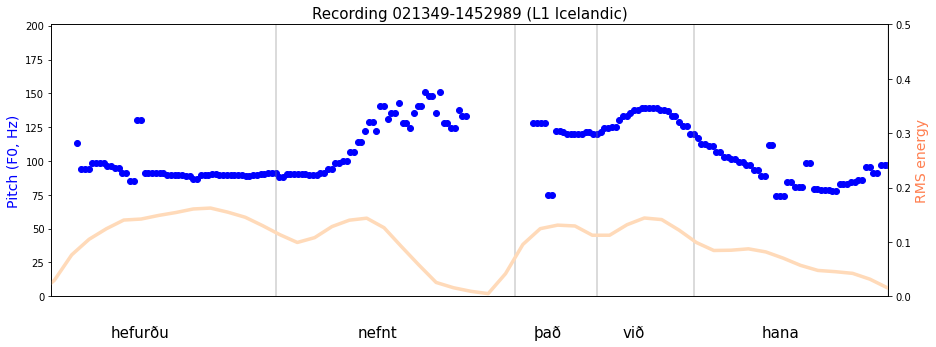




> Listen to 025617-2366289.wav


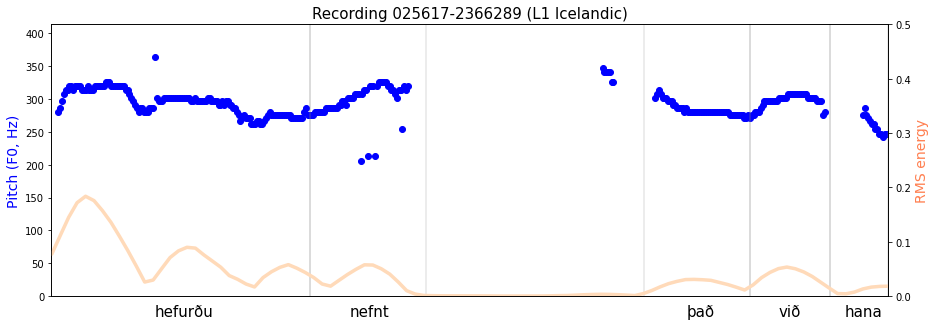




> Listen to 021365-1454160.wav


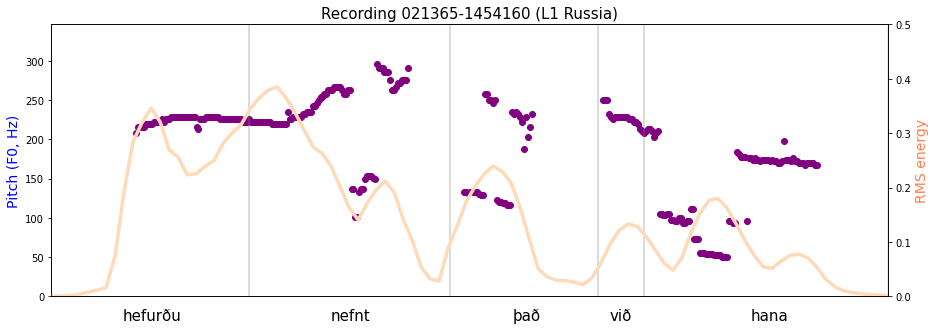




> Listen to 027752-2806167.wav


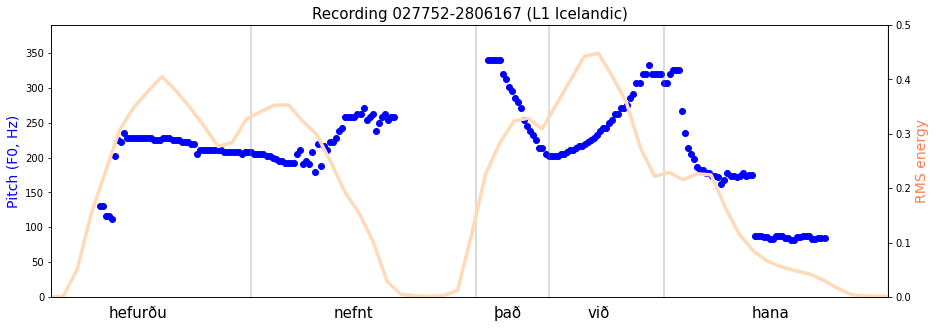




> Listen to 027280-3103501.wav


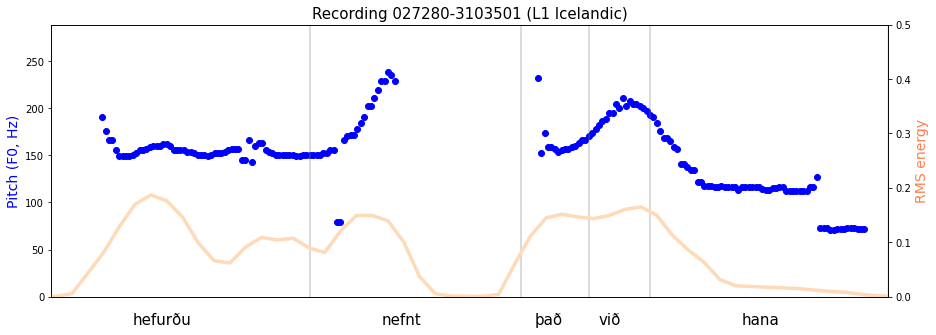




> Listen to 021351-1453157.wav


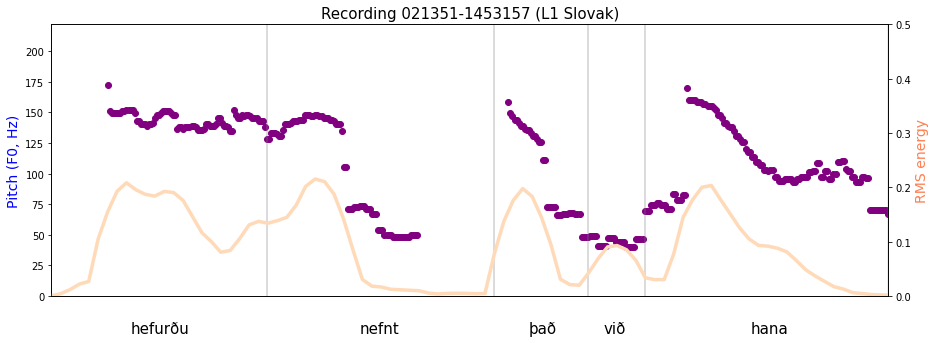




> Listen to 027080-2483951.wav


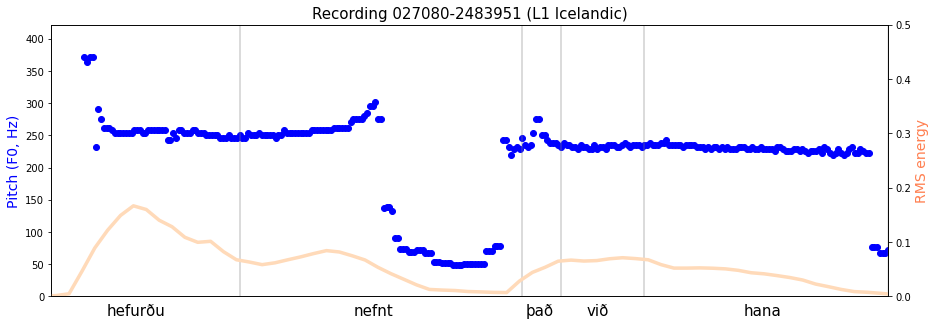




> Listen to 021358-1453891.wav


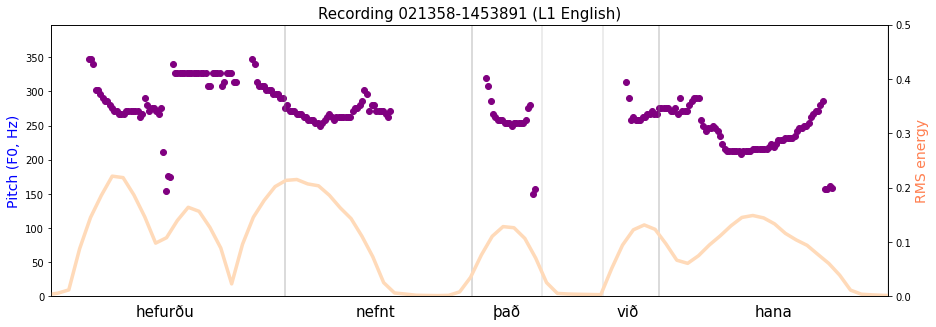




> Listen to 022105-2114789.wav


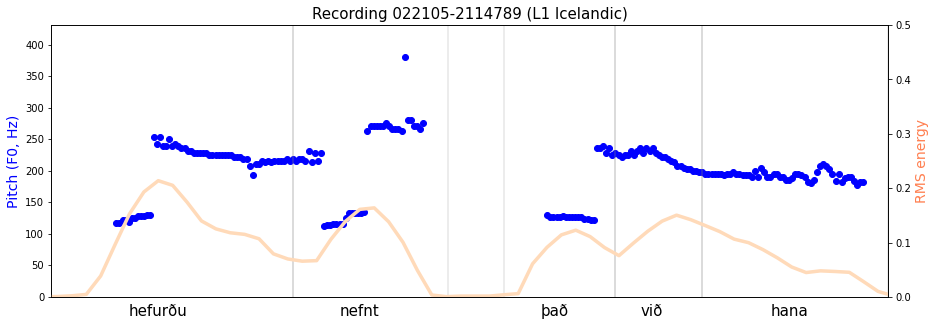




> Listen to 021364-1454382.wav


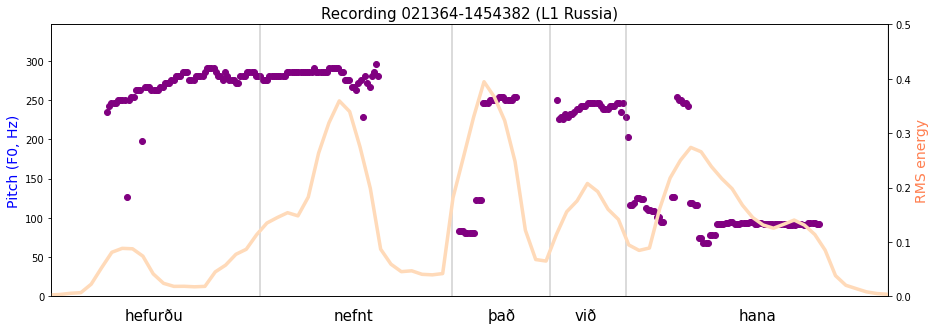




> Listen to 021367-1454599.wav


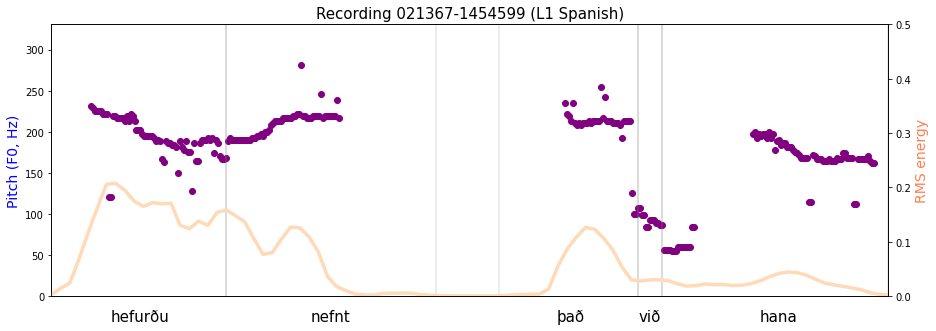

In [67]:
#@title 4. Show prosody tracks for a sentence 

#@markdown Change the number to pick a different sentence, 
#@markdown and click on the arrow again to see the new graphs.

sent_choice = 20 #@param {type:"integer"}


# function to show everything for a single recording
def graph_recording(file_id,align_dat,f0_data):

  # fetch data
  sound_file = f'aligned-reaper/{dataset}/wav/{file_id}.wav'
  f0_data = [[t,f0] for t,prob,f0 in f0_data if prob==1.0]
  f_max = max([f0 for t,f0 in f0_data]) + 50

  # set up the graph shape
  rec_start = align_dat[0][1]
  rec_end = align_dat[-1][2]

  fig, axes1 = plt.subplots(figsize=(15,5))
  plt.xlim([rec_start, rec_end])
  axes1.set_ylim([0.0, f_max])
  axes1.get_xaxis().set_visible(False)

  # draw word boundaries
  for w,s,e in align_dat:
    plt.vlines(s,0,f_max,linewidth=0.3,color='gray')
    plt.vlines(e,0,f_max,linewidth=0.3,color='gray')
    plt.text( (s+e)/2 - (len(w)*.01), -30, w, fontsize=15)

  # show pitch track
  if language_dict[file_id]== 'Icelandic':
    f0c = "blue"
  else:
    f0c = "purple"
  axes1.scatter([t for t,f0 in f0_data], [f0 for t,f0 in f0_data], color=f0c)


  # get rms energy
  w, sr = librosa.load(sound_file)
  fr_l = 2048 # librosa default
  h_l = 512 # default
  rmse = librosa.feature.rms(w, frame_length = fr_l, hop_length = h_l)
  rmse = rmse[0]

  # show rms energy
  axes2 = axes1.twinx()
  axes2.set_ylim([0.0, 0.5])
  rms_xval = [(h_l*i)/sr for i in range(len(rmse))]
  axes2.plot(rms_xval,rmse,color='peachpuff',linewidth=3.5)


  # label the graph
  axes1.set_ylabel("Pitch (F0, Hz)", fontsize=14, color="blue")
  axes2.set_ylabel("RMS energy", fontsize=14,color="coral")
  plt.title(f'Recording {file_id} (L1 {language_dict[file_id]})', fontsize=15)

  # playable audio above the graph
  print(f'> Listen to {file_id}.wav')
  display.display(display.Audio(sound_file))
  display.display(plt.gcf())
  sleep(0.1)


# limit the output to graph at most 20 L1 speakers per run
# consecutive runs of the same sentence can pick different samples
def limit_graphs(sent_datas,max_disp=15):
  if limit_max:
    l1_recs = [f_id for f_id, align_data, f0_data in sent_datas if language_dict[f_id] == 'Icelandic']
    if len(l1_recs) > max_disp:
      num_remove = len(l1_recs) - max_disp
      remove = random.sample(l1_recs,num_remove)
      sent_datas = [l for l in sent_datas if l[0] not in remove]
  return sent_datas
  
# show all recordings of the selected sentence
sent_datas = sentences_filtered[wrapper[sent_choice]]
sent_datas = limit_graphs(sent_datas)
for rec in sent_datas:
  graph_recording(*rec)
  print('\n\n')
  plt.close('all')


---
**If something is:**
- **interesting**
- **broken**
- **bad audio quality, background noise, or multiple speakers**
- **aligned wrong or has a tracking error**
- **unexpected, such as a child, or person speaking the wrong sentence/language**

**please keep a note with the recording number.**  

There are probably some pitch doubling or pitch-halfing errors. See §2.2.2 Ding et al. 2021 *F0 Patterns of L2 English Speech by Mandarin Chinese Learners* to try to fix this.  

---  

comments etc. to caitlinr@ru.is  
https://github.com/catiR/aligned-reaper
